In [2]:
import spacy
import numpy as np
import pandas as pd 
from spacy.lang.en.stop_words import STOP_WORDS
import string

In [127]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [4]:
train=train[['text','target']]

In [5]:
train

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...
7608,Two giant cranes holding a bridge collapse int...,1
7609,@aria_ahrary @TheTawniest The out of control w...,1
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,Police investigating after an e-bike collided ...,1


In [6]:
train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [7]:
##Word Counts

In [8]:
train['word_counts']=train['text'].apply(lambda x:len(str(x).split()))

In [9]:
train

,text,target,word_counts
0,Our Deeds are the Reason of this #earthquake M...,1,13
1,Forest fire near La Ronge Sask. Canada,1,7
2,All residents asked to 'shelter in place' are ...,1,22
3,"13,000 people receive #wildfires evacuation or...",1,8
4,Just got sent this photo from Ruby #Alaska as ...,1,16
...,...,...,...
7608,Two giant cranes holding a bridge collapse int...,1,11
7609,@aria_ahrary @TheTawniest The out of control w...,1,20
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,8
7611,Police investigating after an e-bike collided ...,1,19


In [10]:
###Character counts

In [11]:
train['char_count']=train['text'].apply(lambda x:len(x))

In [12]:
train

,text,target,word_counts,char_count
0,Our Deeds are the Reason of this #earthquake M...,1,13,69
1,Forest fire near La Ronge Sask. Canada,1,7,38
2,All residents asked to 'shelter in place' are ...,1,22,133
3,"13,000 people receive #wildfires evacuation or...",1,8,65
4,Just got sent this photo from Ruby #Alaska as ...,1,16,88
...,...,...,...,...
7608,Two giant cranes holding a bridge collapse int...,1,11,83
7609,@aria_ahrary @TheTawniest The out of control w...,1,20,125
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,8,65
7611,Police investigating after an e-bike collided ...,1,19,137


In [13]:
###Average Words

In [14]:
def get_avg_word_len(x):
    words=x.split()
    word_len=0
    for word in words:
        word_len=word_len+len(word)
    return word_len/len(words)

In [15]:
train['avg_word_count']=train['text'].apply(lambda x: get_avg_word_len(x))

In [16]:
train

,text,target,word_counts,char_count,avg_word_count
0,Our Deeds are the Reason of this #earthquake M...,1,13,69,4.384615
1,Forest fire near La Ronge Sask. Canada,1,7,38,4.571429
2,All residents asked to 'shelter in place' are ...,1,22,133,5.090909
3,"13,000 people receive #wildfires evacuation or...",1,8,65,7.125000
4,Just got sent this photo from Ruby #Alaska as ...,1,16,88,4.500000
...,...,...,...,...,...
7608,Two giant cranes holding a bridge collapse int...,1,11,83,6.636364
7609,@aria_ahrary @TheTawniest The out of control w...,1,20,125,5.300000
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,8,65,7.250000
7611,Police investigating after an e-bike collided ...,1,19,137,6.263158


In [17]:
import re
import unicodedata

In [18]:
##Remove E-mail

In [19]:
train['text']=train['text'].apply(lambda x:re.sub(r'([a-zA-Z0-9+_-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)','',x))

In [20]:
train

,text,target,word_counts,char_count,avg_word_count
0,Our Deeds are the Reason of this #earthquake M...,1,13,69,4.384615
1,Forest fire near La Ronge Sask. Canada,1,7,38,4.571429
2,All residents asked to 'shelter in place' are ...,1,22,133,5.090909
3,"13,000 people receive #wildfires evacuation or...",1,8,65,7.125000
4,Just got sent this photo from Ruby #Alaska as ...,1,16,88,4.500000
...,...,...,...,...,...
7608,Two giant cranes holding a bridge collapse int...,1,11,83,6.636364
7609,@aria_ahrary @TheTawniest The out of control w...,1,20,125,5.300000
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,8,65,7.250000
7611,Police investigating after an e-bike collided ...,1,19,137,6.263158


In [21]:
train['text']=train['text'].apply(lambda x:str(x).lower())

In [22]:
train

,text,target,word_counts,char_count,avg_word_count
0,our deeds are the reason of this #earthquake m...,1,13,69,4.384615
1,forest fire near la ronge sask. canada,1,7,38,4.571429
2,all residents asked to 'shelter in place' are ...,1,22,133,5.090909
3,"13,000 people receive #wildfires evacuation or...",1,8,65,7.125000
4,just got sent this photo from ruby #alaska as ...,1,16,88,4.500000
...,...,...,...,...,...
7608,two giant cranes holding a bridge collapse int...,1,11,83,6.636364
7609,@aria_ahrary @thetawniest the out of control w...,1,20,125,5.300000
7610,m1.94 [01:04 utc]?5km s of volcano hawaii. htt...,1,8,65,7.250000
7611,police investigating after an e-bike collided ...,1,19,137,6.263158


In [23]:
##Remove URL

In [24]:
train['text']=train['text'].apply(lambda x:re.sub(r"http\S+", "", x))

In [25]:
train

,text,target,word_counts,char_count,avg_word_count
0,our deeds are the reason of this #earthquake m...,1,13,69,4.384615
1,forest fire near la ronge sask. canada,1,7,38,4.571429
2,all residents asked to 'shelter in place' are ...,1,22,133,5.090909
3,"13,000 people receive #wildfires evacuation or...",1,8,65,7.125000
4,just got sent this photo from ruby #alaska as ...,1,16,88,4.500000
...,...,...,...,...,...
7608,two giant cranes holding a bridge collapse int...,1,11,83,6.636364
7609,@aria_ahrary @thetawniest the out of control w...,1,20,125,5.300000
7610,m1.94 [01:04 utc]?5km s of volcano hawaii.,1,8,65,7.250000
7611,police investigating after an e-bike collided ...,1,19,137,6.263158


In [26]:
##Remove Punctuation

In [27]:
train['text']=train['text'].apply(lambda x:re.sub('[^A-Z a-z 0-9-]+','',x))

In [28]:
train

,text,target,word_counts,char_count,avg_word_count
0,our deeds are the reason of this earthquake ma...,1,13,69,4.384615
1,forest fire near la ronge sask canada,1,7,38,4.571429
2,all residents asked to shelter in place are be...,1,22,133,5.090909
3,13000 people receive wildfires evacuation orde...,1,8,65,7.125000
4,just got sent this photo from ruby alaska as s...,1,16,88,4.500000
...,...,...,...,...,...
7608,two giant cranes holding a bridge collapse int...,1,11,83,6.636364
7609,ariaahrary thetawniest the out of control wild...,1,20,125,5.300000
7610,m194 0104 utc5km s of volcano hawaii,1,8,65,7.250000
7611,police investigating after an e-bike collided ...,1,19,137,6.263158


In [29]:
##Remove multiple Spaces

In [30]:
train['text']=train['text'].apply(lambda x:" ".join(x.split()))

In [31]:
train

,text,target,word_counts,char_count,avg_word_count
0,our deeds are the reason of this earthquake ma...,1,13,69,4.384615
1,forest fire near la ronge sask canada,1,7,38,4.571429
2,all residents asked to shelter in place are be...,1,22,133,5.090909
3,13000 people receive wildfires evacuation orde...,1,8,65,7.125000
4,just got sent this photo from ruby alaska as s...,1,16,88,4.500000
...,...,...,...,...,...
7608,two giant cranes holding a bridge collapse int...,1,11,83,6.636364
7609,ariaahrary thetawniest the out of control wild...,1,20,125,5.300000
7610,m194 0104 utc5km s of volcano hawaii,1,8,65,7.250000
7611,police investigating after an e-bike collided ...,1,19,137,6.263158


In [32]:
###Remove Accented Char

In [33]:
def remove_acc_char(x):
    x=unicodedata.normalize('NFKD',x).encode('ascii','ignore').decode('utf-8','ignore')
    return x

In [34]:
train['text']=train['text'].apply(remove_acc_char)

In [35]:
train

,text,target,word_counts,char_count,avg_word_count
0,our deeds are the reason of this earthquake ma...,1,13,69,4.384615
1,forest fire near la ronge sask canada,1,7,38,4.571429
2,all residents asked to shelter in place are be...,1,22,133,5.090909
3,13000 people receive wildfires evacuation orde...,1,8,65,7.125000
4,just got sent this photo from ruby alaska as s...,1,16,88,4.500000
...,...,...,...,...,...
7608,two giant cranes holding a bridge collapse int...,1,11,83,6.636364
7609,ariaahrary thetawniest the out of control wild...,1,20,125,5.300000
7610,m194 0104 utc5km s of volcano hawaii,1,8,65,7.250000
7611,police investigating after an e-bike collided ...,1,19,137,6.263158


In [36]:
###Spacy and NLP

In [37]:
##Remove Stopwords

In [38]:
train['text']=train['text'].apply(lambda x:" ".join([t for t in x.split() if t not in STOP_WORDS]))

In [39]:
train

,text,target,word_counts,char_count,avg_word_count
0,deeds reason earthquake allah forgive,1,13,69,4.384615
1,forest fire near la ronge sask canada,1,7,38,4.571429
2,residents asked shelter place notified officer...,1,22,133,5.090909
3,13000 people receive wildfires evacuation orde...,1,8,65,7.125000
4,got sent photo ruby alaska smoke wildfires pou...,1,16,88,4.500000
...,...,...,...,...,...
7608,giant cranes holding bridge collapse nearby homes,1,11,83,6.636364
7609,ariaahrary thetawniest control wild fires cali...,1,20,125,5.300000
7610,m194 0104 utc5km s volcano hawaii,1,8,65,7.250000
7611,police investigating e-bike collided car littl...,1,19,137,6.263158


In [40]:
nlp = spacy.load("en_core_web_sm")

In [41]:
##Coverting word into base form(lemmatization)

In [42]:
x="A letter has been written, asking him to be released"

In [43]:
def make_base(x):
    x_list=[]
    doc=nlp(x)

    for token in doc:
      lemma=str(token.lemma_)
      if lemma=='-PRON-':
        lemma=token.text
      x_list.append(lemma)
    print(" ".join(x_list))

In [44]:
make_base(x)

a letter have be write , ask him to be release


In [45]:
##Common word removal

In [46]:
text1=' '.join(train['text'])

In [47]:
text1=text1.split()

In [48]:
freq_comm=pd.Series(text1).value_counts()

In [49]:
f20=freq_comm[:20]

In [50]:
f20

-             778
like          344
im            302
amp           298
fire          249
new           226
dont          206
people        196
news          187
video         164
2             158
emergency     156
disaster      151
police        140
body          125
burning       120
crash         117
california    117
suicide       116
storm         115
dtype: int64

In [51]:
#train['text']=train['text'].apply(lambda x:" ".join([t for t in x.split() if t not in f20]))

In [52]:
train

,text,target,word_counts,char_count,avg_word_count
0,deeds reason earthquake allah forgive,1,13,69,4.384615
1,forest fire near la ronge sask canada,1,7,38,4.571429
2,residents asked shelter place notified officer...,1,22,133,5.090909
3,13000 people receive wildfires evacuation orde...,1,8,65,7.125000
4,got sent photo ruby alaska smoke wildfires pou...,1,16,88,4.500000
...,...,...,...,...,...
7608,giant cranes holding bridge collapse nearby homes,1,11,83,6.636364
7609,ariaahrary thetawniest control wild fires cali...,1,20,125,5.300000
7610,m194 0104 utc5km s volcano hawaii,1,8,65,7.250000
7611,police investigating e-bike collided car littl...,1,19,137,6.263158


In [53]:
##Rare word Removal

In [54]:
rare=freq_comm[freq_comm.values==1]

In [55]:
rare

autism                 1
loo                    1
tantonationalforest    1
phantasmal             1
detains                1
                      ..
com                    1
invented               1
rachelrofe             1
12m                    1
nlmdimrc               1
Length: 11403, dtype: int64

In [56]:
#Apply same as common word removal

In [57]:
##Word Cloud Visualization

In [58]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

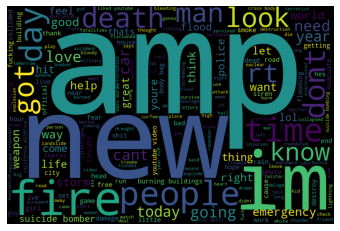

In [59]:
wc=WordCloud(width=1200,height=800).generate(' '.join(train['text']))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [60]:
##Spelling Correction

In [61]:
from textblob import TextBlob

In [62]:
#pip install pyspellchecker

In [63]:
#from spellchecker import SpellChecker

In [64]:
#spell=SpellChecker()
#train['text']=train['text'].apply(lambda x:spell.correction(x))

In [65]:
##Bag of words

In [66]:
from sklearn.feature_extraction.text import CountVectorizer

In [67]:
cv=CountVectorizer(ngram_range=(1,1))
text_count=cv.fit_transform(train['text'])

In [68]:
text_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [69]:
##TF-IDF

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [71]:
tfidf=TfidfVectorizer(max_df=0.5,min_df=2,ngram_range=(1,2))
x_tfidf=tfidf.fit_transform(train['text'])

In [72]:
x_tfidf.toarray().shape

(7613, 11026)

In [73]:
##Word Embedding

In [74]:
#Spacy Word2vec

In [75]:
#!python -m spacy download en_core_web_lg

In [76]:
#nlp=spacy.load('en_core_web_lg')

In [147]:
from sklearn import model_selection
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [78]:
lgr=LogisticRegression(random_state=42,max_iter=200)
svm=LinearSVC(random_state=42,max_iter=200)
rfc=RandomForestClassifier(random_state=42,n_jobs=-1,n_estimators=200)
xgb=XGBClassifier(random_state=42,max_depth=7,n_estimators=200)

In [79]:
clf={'SVM':svm,'RFC':rfc,'XGB':xgb,'LGR':lgr}

In [80]:
y=train['target']


In [81]:
scaler=MinMaxScaler(feature_range=(0,1))
X=scaler.fit_transform(pd.DataFrame(x_tfidf.toarray()))

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.20,stratify=y)
for key in clf.keys():
          clf[key].fit(X_train,y_train)
          y_pred=clf[key].predict(X_test)
          f1=f1_score(y_test,y_pred)
          print(key,"----",f1)
  

'scaler=MinMaxScaler(feature_range=(0,1))\nX=scaler.fit_transform(pd.DataFrame(x_tfidf.toarray()))\n\nX_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.20,stratify=y)\nfor key in clf.keys():\n          clf[key].fit(X_train,y_train)\n          y_pred=clf[key].predict(X_test)\n          f1=f1_score(y_test,y_pred)\n          print(key,"----",f1)\n    '

In [99]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer

from tensorflow.keras.layers import Dense,Dropout,LSTM,SpatialDropout1D

In [83]:
voc_size=5000

In [193]:
X=[d.split() for d in train['text'].tolist()]

In [194]:
tokeniser=Tokenizer()
tokeniser.fit_on_texts(X)

In [195]:
X=tokeniser.texts_to_sequences(X)

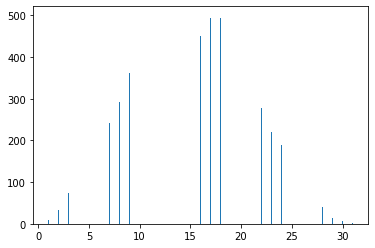

In [196]:
plt.hist([len(x) for x in X], bins=700)
plt.show()

In [153]:
nos=np.array([len(x) for x in X])
len(nos[nos>17])

2627

In [197]:
sent_length=24
embed_docs=pad_sequences(X,padding='pre',maxlen=sent_length)

In [85]:
embed_docs[10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [198]:
vocab_sizee=len(tokeniser.word_index)+1

In [199]:
embedding_vector_features=32
model=Sequential()
model.add(Embedding(vocab_sizee,embedding_vector_features,input_length=sent_length))
                                
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(120,return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(40))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', 
                           metrics=['accuracy'])

In [200]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 24, 32)            895488    
_________________________________________________________________
spatial_dropout1d_9 (Spatial (None, 24, 32)            0         
_________________________________________________________________
lstm_26 (LSTM)               (None, 24, 50)            16600     
_________________________________________________________________
dropout_16 (Dropout)         (None, 24, 50)            0         
_________________________________________________________________
lstm_27 (LSTM)               (None, 24, 120)           82080     
_________________________________________________________________
dropout_17 (Dropout)         (None, 24, 120)           0         
_________________________________________________________________
lstm_28 (LSTM)               (None, 40)              

In [158]:
len(embed_docs),y.shape

(7613, (7613,))

In [201]:
X_final=np.array(embed_docs)
Y_final=np.array(y)

In [202]:
X_final.shape,Y_final.shape

((7613, 24), (7613,))

In [203]:
x_train,x_test,Y_Train,Y_Test=train_test_split(X_final,Y_final,test_size=0.2,random_state=42)

In [204]:
x_train.shape,Y_Train.shape

((6090, 24), (6090,))

In [206]:
model.fit(x_train,Y_Train,validation_data=(x_test,Y_Test),epochs=10,batch_size=64)

Epoch 1/10
96/96 [==============================] - 2s 20ms/step - loss: 0.0130 - accuracy: 0.9962 - val_loss: 1.0454 - val_accuracy: 0.7590
Epoch 2/10
96/96 [==============================] - 2s 19ms/step - loss: 0.0143 - accuracy: 0.9952 - val_loss: 0.9611 - val_accuracy: 0.7479
Epoch 3/10
96/96 [==============================] - 2s 19ms/step - loss: 0.0109 - accuracy: 0.9956 - val_loss: 1.0674 - val_accuracy: 0.7492
Epoch 4/10
96/96 [==============================] - 2s 19ms/step - loss: 0.0105 - accuracy: 0.9970 - val_loss: 1.1369 - val_accuracy: 0.7623
Epoch 5/10
96/96 [==============================] - 2s 19ms/step - loss: 0.0087 - accuracy: 0.9967 - val_loss: 1.1338 - val_accuracy: 0.7525
Epoch 6/10
96/96 [==============================] - 2s 19ms/step - loss: 0.0112 - accuracy: 0.9962 - val_loss: 0.9926 - val_accuracy: 0.7531
Epoch 7/10
96/96 [==============================] - 2s 19ms/step - loss: 0.0091 - accuracy: 0.9957 - val_loss: 1.0678 - val_accuracy: 0.7610
Epoch 8/10
96

In [207]:
Y_pred=model.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [208]:
accuracy_score(Y_Test,Y_pred)

0.7609980302035456

In [209]:
print(classification_report(Y_Test,Y_pred))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81       874
           1       0.78      0.61      0.68       649

    accuracy                           0.76      1523
   macro avg       0.77      0.74      0.75      1523
weighted avg       0.76      0.76      0.76      1523



In [215]:
def predict(tweet):
    test_word = tweet
    tw = tokeniser.texts_to_sequences([test_word])
    tw = pad_sequences(tw,padding='pre',maxlen=17)
    prediction = int(model.predict(tw).round().item())
    if(prediction==0):
        return('No Disaster')
    else:
        return('Disaster')

In [216]:
predict('Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all')

'Disaster'

In [217]:
predict('Damage to school bus on 80 in multi car crash #BREAKING')

'Disaster'